This assignment was done by 
- Ivan George Kuruvila (33763943)
- Alif Zahir Animon Shoma (33771899)

Ivan is the team captain of the assigment 

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
data = pd.read_csv("datcw_na.csv")

#### Renaming the column to relevant names for analysis

In [3]:
data.rename({   
    'X0': 'Category-Building', 
    'X1': 'Relative-Compactness', 
    'X2': 'Surface-Area',
    'X3': 'Wall-Area',
    'X4': 'Roof-Area',
    'X5': 'Overall-Height',
    'X6': 'Orientation',
    'X7': 'Glazing-Area',
    'X8': 'Glazing-Area-Distribution',
    'Y': 'Heating-Load'
    }, 
    axis=1, 
    inplace=True )                        

In [4]:
data.head()

,Category-Building,Relative-Compactness,Surface-Area,Wall-Area,Roof-Area,Overall-Height,Orientation,Glazing-Area,Glazing-Area-Distribution,Heating-Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category-Building          768 non-null    object 
 1   Relative-Compactness       768 non-null    float64
 2   Surface-Area               768 non-null    float64
 3   Wall-Area                  728 non-null    float64
 4   Roof-Area                  768 non-null    float64
 5   Overall-Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing-Area               768 non-null    float64
 8   Glazing-Area-Distribution  768 non-null    float64
 9   Heating-Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


## Create a Test Set

It's best to split your data into training and test sets before performing any preprocessing steps like normalization and visualisation , because this more closely simulates the real-world scenario where you have to predict outcomes on new, unseen data.

In [6]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [7]:
# split the data into train and test sets, for model training and evaluation, respectively

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
train_set.shape

(614, 10)

In [9]:
test_set.shape

(154, 10)

From looking at the .info() output its evident that column X3 has some null values compared to the rest of the columns

In [10]:
# here's useful description of the data counts and distributions of variables
train_set.describe()

,Relative-Compactness,Surface-Area,Wall-Area,Roof-Area,Overall-Height,Orientation,Glazing-Area,Glazing-Area-Distribution,Heating-Load
count,614.000000,614.000000,585.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.761482,667.839446,321.435744,177.436433,5.198436,3.536010,0.238599,2.793046,22.155033
std,0.148796,121.983220,60.425349,50.399523,1.848272,1.224061,0.140671,1.608459,10.054280
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.640000,577.162500,277.830000,132.300000,3.470000,2.430000,0.100000,1.312500,12.977500
50%,0.740000,661.500000,315.320000,178.600000,4.240000,3.600000,0.245000,2.700000,18.250000
75%,0.860000,749.207500,355.740000,218.300000,6.930000,4.500000,0.360000,3.960000,31.545000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


In [11]:
# Created a dataset that stores rows where any of the data is NaN (null) value for analysis

sample_incomplete_rows = train_set[data.isnull().any(axis=1)]
sample_incomplete_rows.head()

/var/folders/3s/c5s2k_992bs5dyvz89jyjljw0000gp/T/ipykernel_7344/2932039509.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_incomplete_rows = train_set[data.isnull().any(axis=1)]


,Category-Building,Relative-Compactness,Surface-Area,Wall-Area,Roof-Area,Overall-Height,Orientation,Glazing-Area,Glazing-Area-Distribution,Heating-Load
608,C1,0.68,808.50,NaN,266.80,3.85,2.20,0.36,1.62,14.75
432,C1,1.19,622.55,NaN,109.15,5.67,1.98,0.22,4.40,28.70
395,C1,0.69,476.28,NaN,145.53,6.93,4.50,0.22,2.70,29.07
333,C1,0.68,727.65,NaN,242.55,3.47,2.70,0.20,0.99,15.12
417,C1,0.84,727.65,NaN,266.80,3.85,2.97,0.25,3.63,12.46


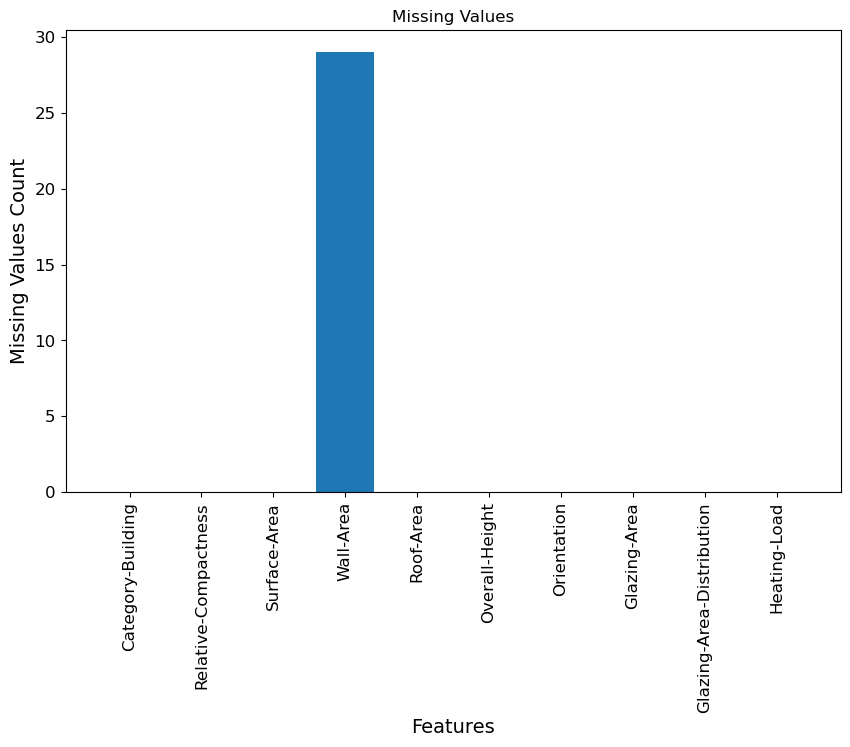

Category-Building             0
Relative-Compactness          0
Surface-Area                  0
Wall-Area                    29
Roof-Area                     0
Overall-Height                0
Orientation                   0
Glazing-Area                  0
Glazing-Area-Distribution     0
Heating-Load                  0
dtype: int64


In [12]:
import matplotlib.pyplot as plt

# Count of missing values
missing_values_count = train_set.isnull().sum()

# Bar plot of missing values
plt.figure(figsize=(10,6))
plt.bar(missing_values_count.index, missing_values_count.values)
plt.title('Missing Values')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=90)
plt.show()
missing_values_count = train_set.isnull().sum()
print(missing_values_count)

From bar chart and table from below we can clearly see that there are only missing values in wall-area column and there are 29 missing values

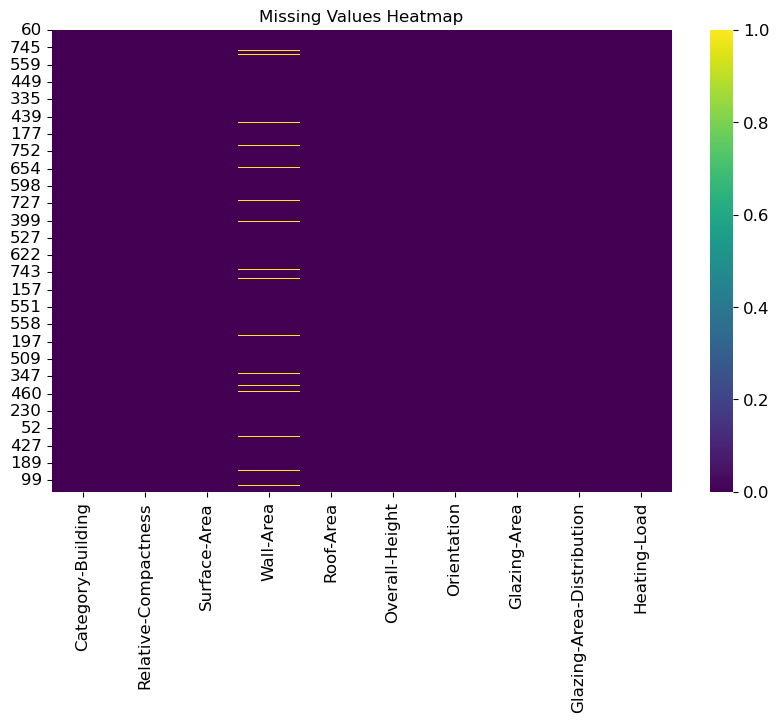

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(train_set.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

We can use a heat map to get a better understanding of the missing rows index as well as the distribution of missing values within the dataset.

There are missing values in "Wall-Area" features 

## Data Inspection & Visualization

#### Frequency Histogram

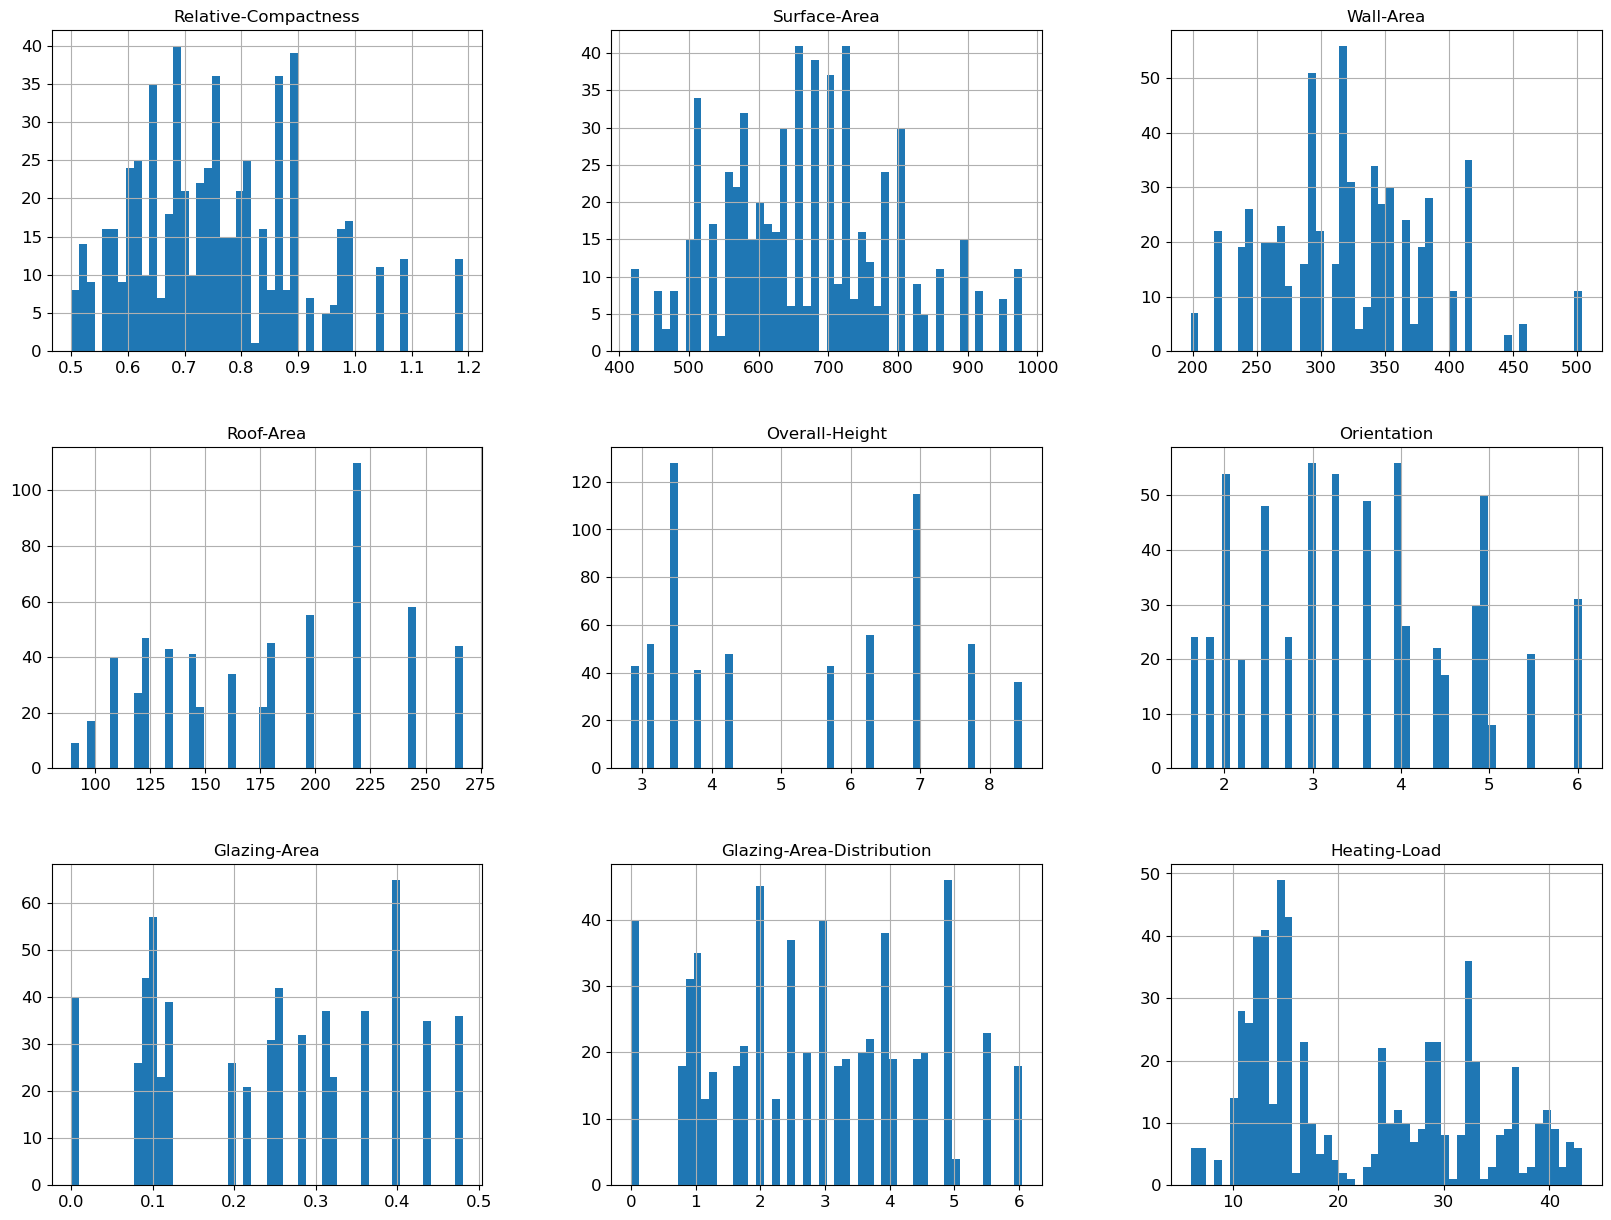

In [14]:
# Histograms visualizing bars of frequencies of numeric values

%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

None of the plots seem to have capped value and the plots are not tail-heavy. So no values need to be removed and no transformations for shape is required

#### Data Distribution Density Graph

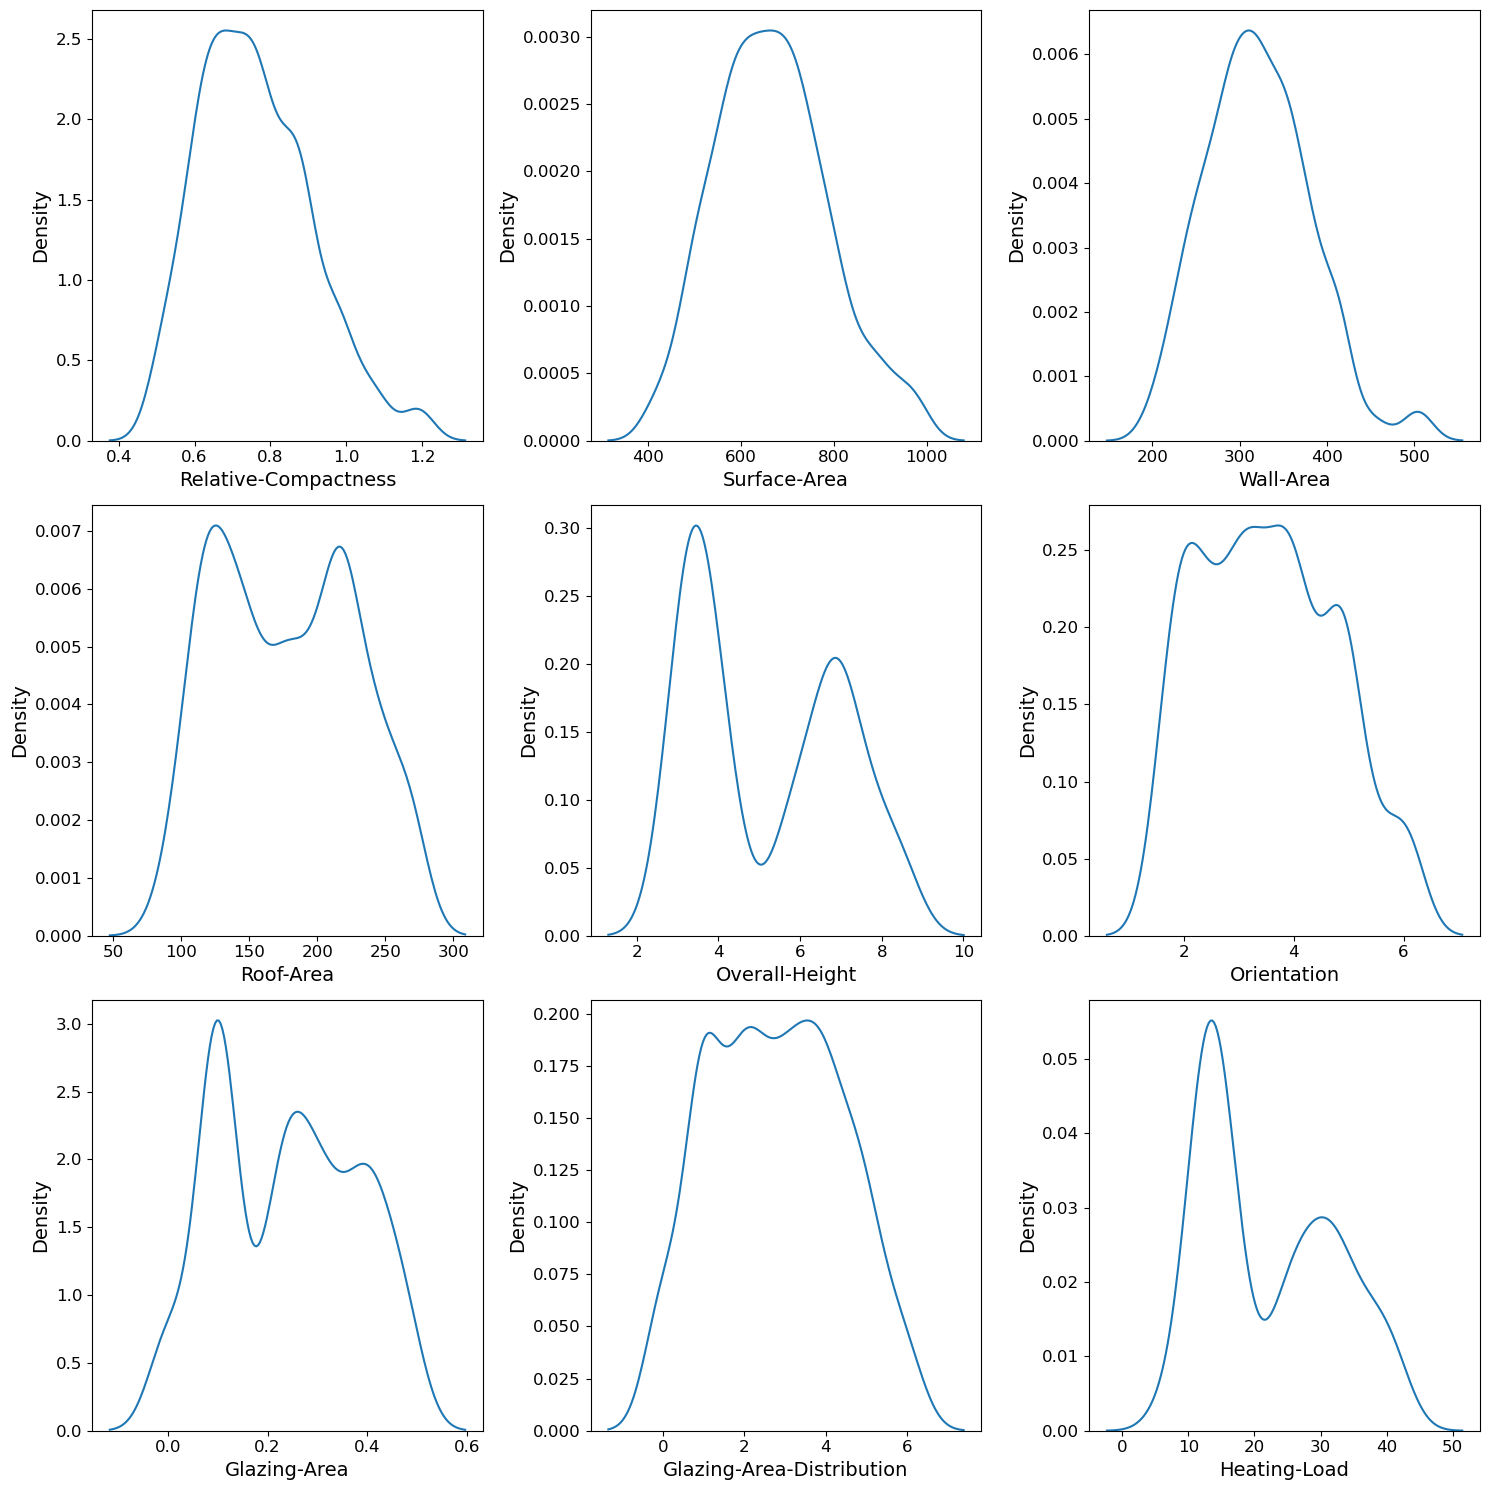

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot density plots for each feature and the outcome variable, excluding X0
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(train_set.columns[1:]):
    row = i // 3
    col = i % 3
    sns.kdeplot(train_set[feature], ax=ax[row][col])
    
plt.tight_layout()
plt.show()

To understand the distribution for each feature a density graph can be used to easily identify the distribution shape. Surface area is the feature closest to a normal distribution, as the curve is almost symmetric where the peak represents the mean value. Relative compactness is shifed a little towards the left signifying a skewed distribution. The density plots help us get a clearer picture of the distribution of feature data 

Closer look at Heating Load

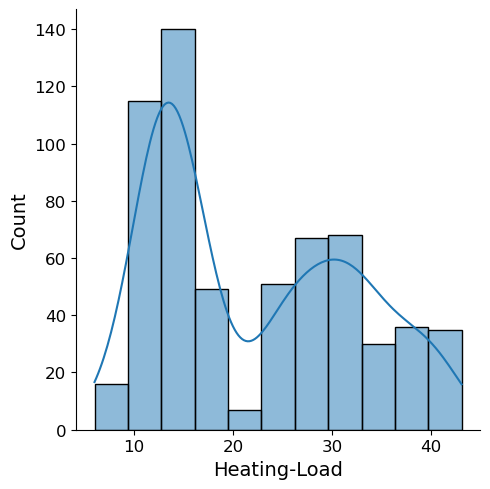

In [16]:
sns.displot(data=train_set, x="Heating-Load", kde=True)

#### Pair Plot

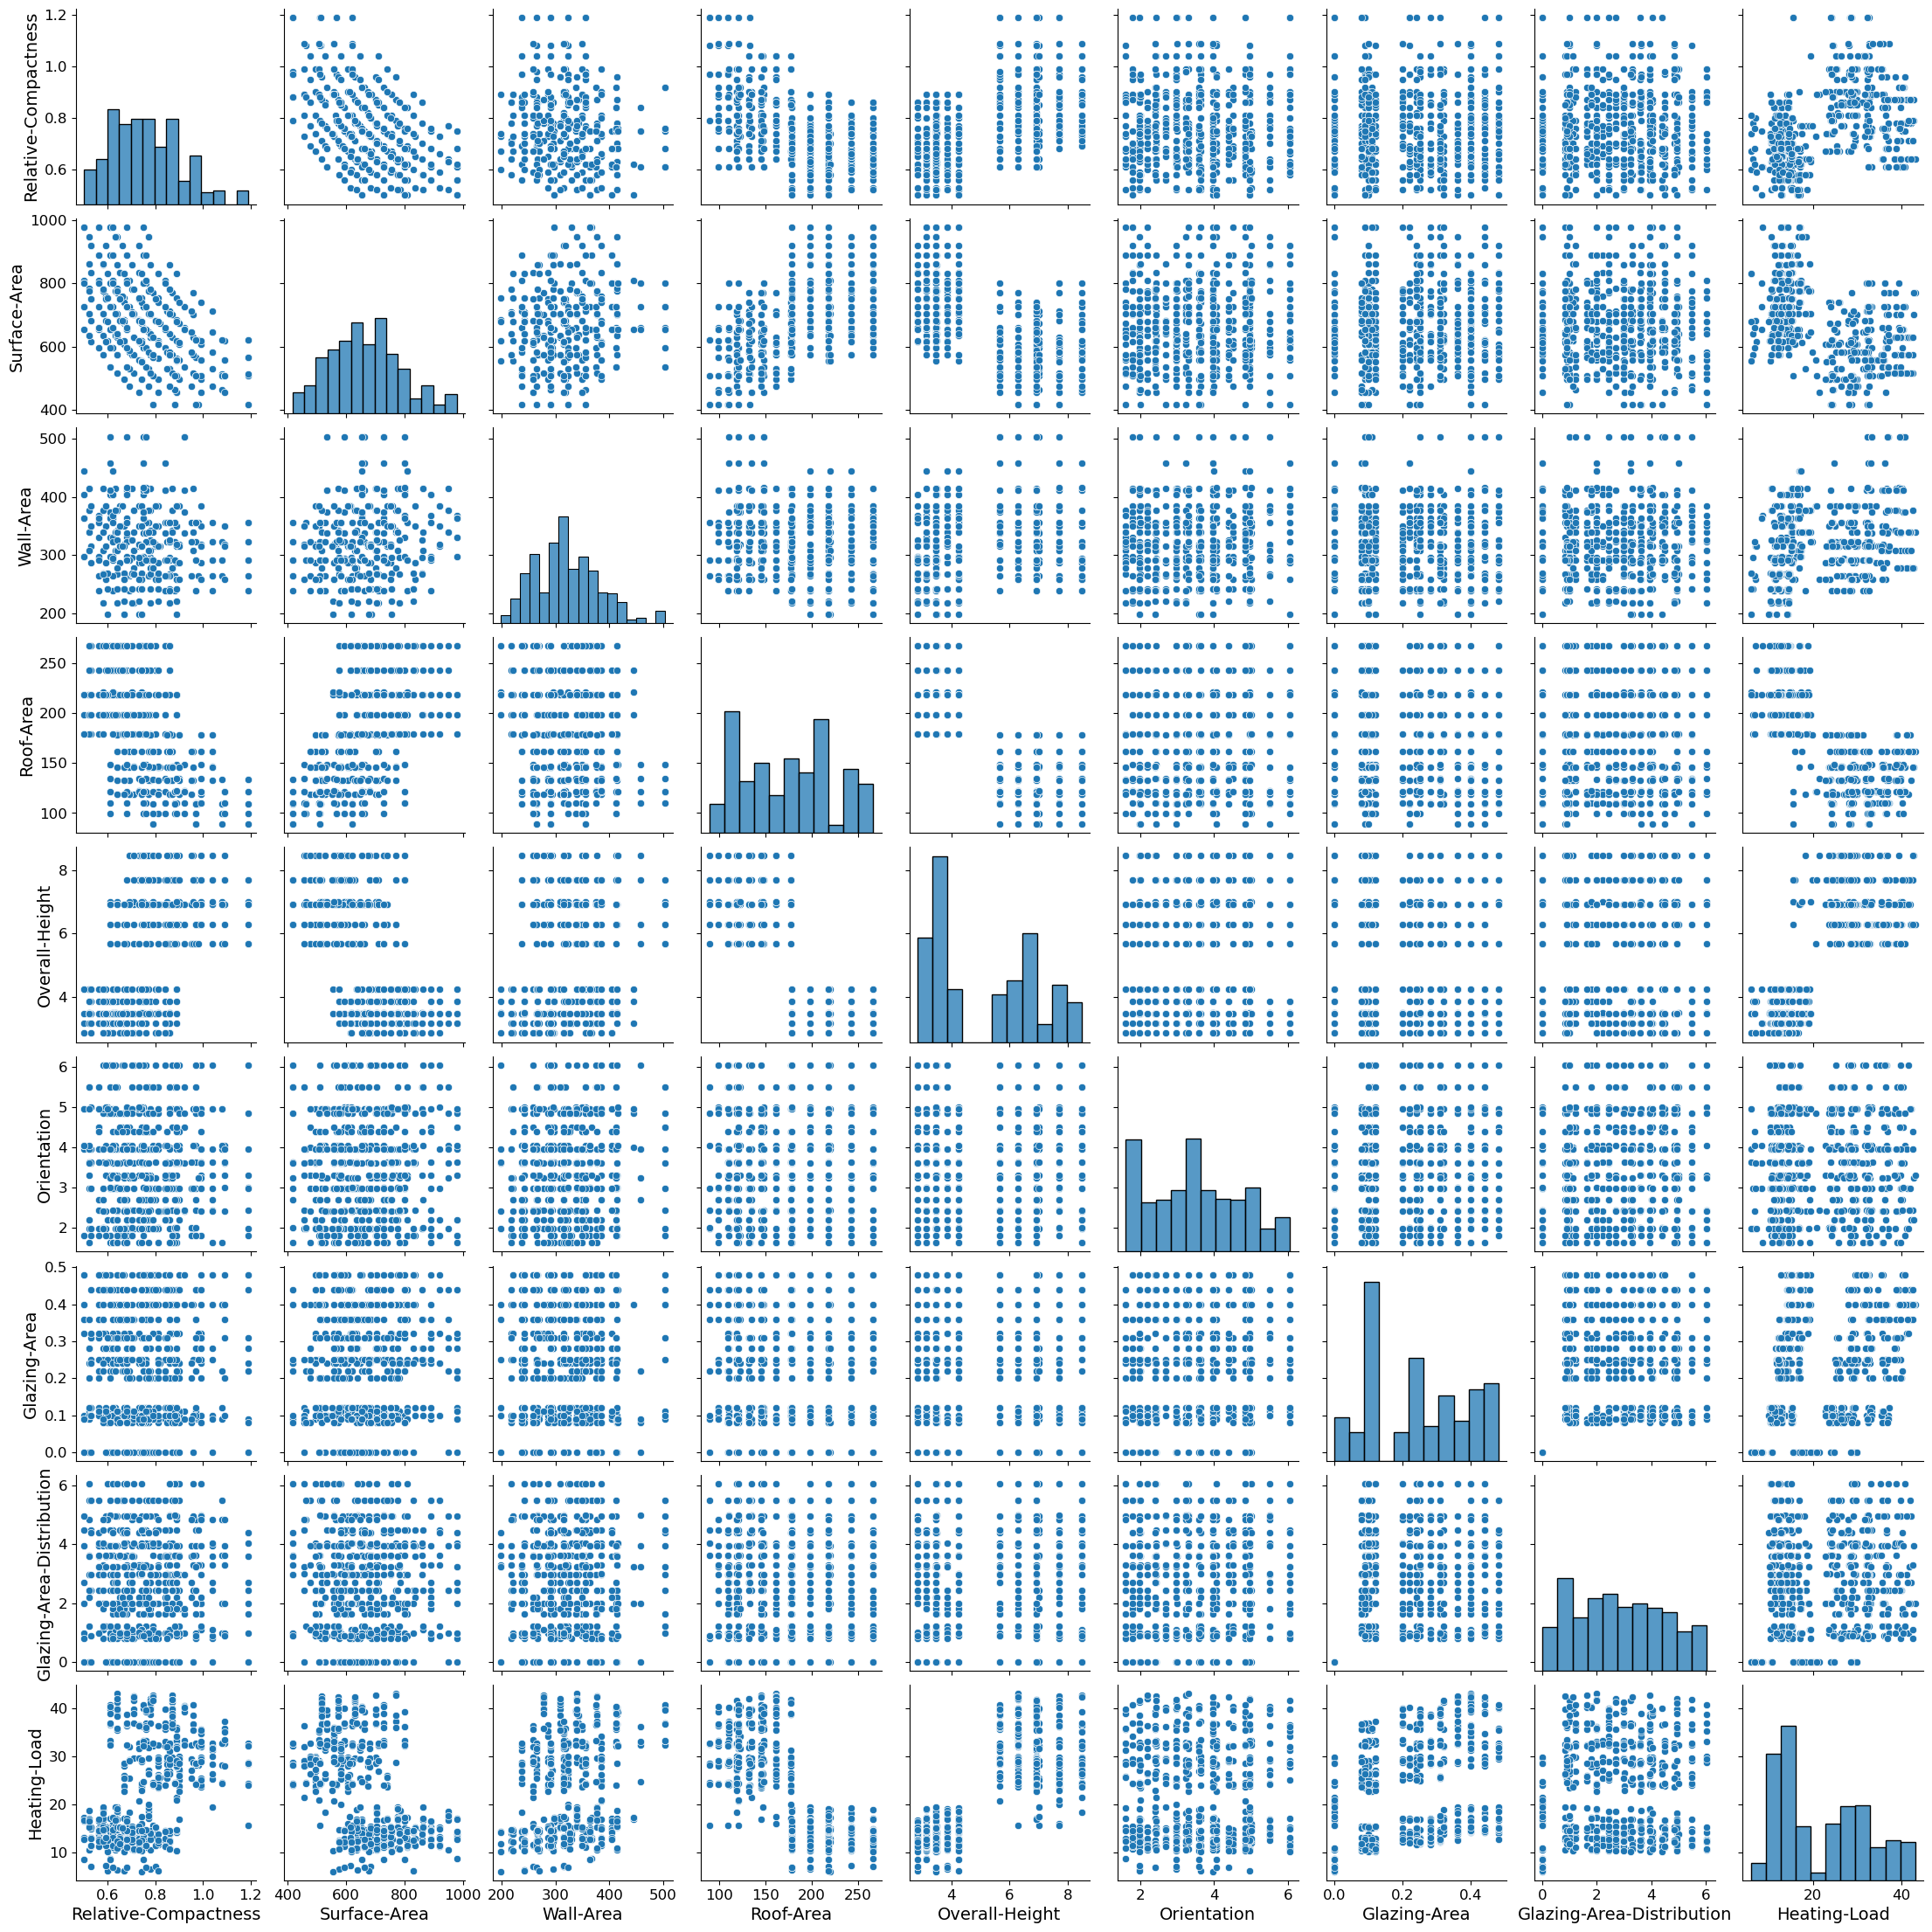

In [17]:
import seaborn as sns

# Create the pair plots
sns.pairplot(train_set)

From the pair plots we can not visually see any correlations hence we decided to use a correlation matrix heatmap to clearly see whether there are any correlations between the features.

#### Correlation Matrix

In [18]:
corr_matrix = train_set.corr()

<AxesSubplot:>

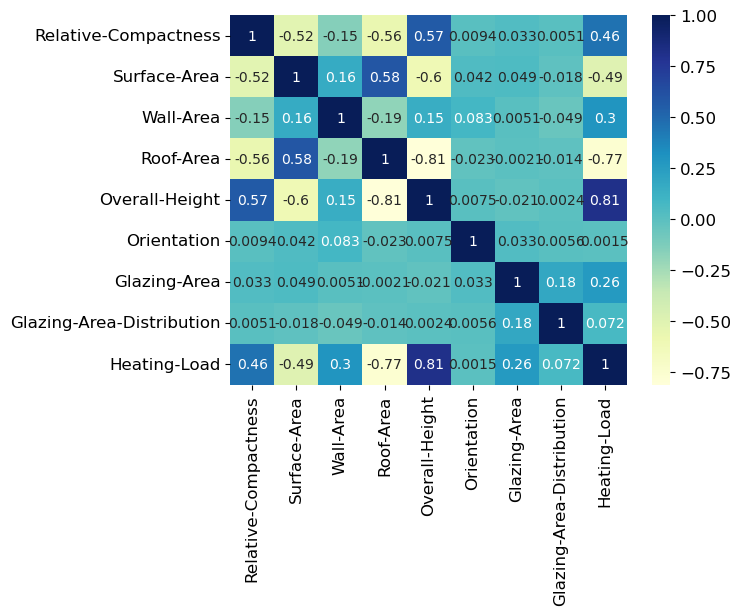

In [19]:
sns.heatmap(train_set.corr(), annot=True, cmap="YlGnBu")

In [20]:
# we see that median income is mostly positively correlated with median house value. 

corr_matrix["Heating-Load"].sort_values(ascending=False)

Heating-Load                 1.000000
Overall-Height               0.814302
Relative-Compactness         0.456545
Wall-Area                    0.297897
Glazing-Area                 0.264530
Glazing-Area-Distribution    0.071628
Orientation                  0.001509
Surface-Area                -0.492765
Roof-Area                   -0.768353
Name: Heating-Load, dtype: float64

Insights:
- As seen from the correlation Overall-Height of the building has the highest postive correlation with the Heating-Load and Roof-Area has the highest negative correlation

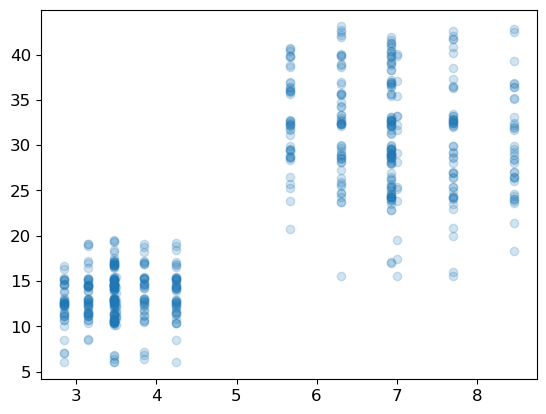

In [21]:
plt.scatter(x = train_set['Overall-Height'], y = train_set['Heating-Load'], alpha=0.2)
plt.show()

For Overall height upto 4.5 (approx.) the heating load goes varies 5 upto 20 and for heights from 5.5 (approx.) to 9 (approx.) the heating load varies from 15 to 45

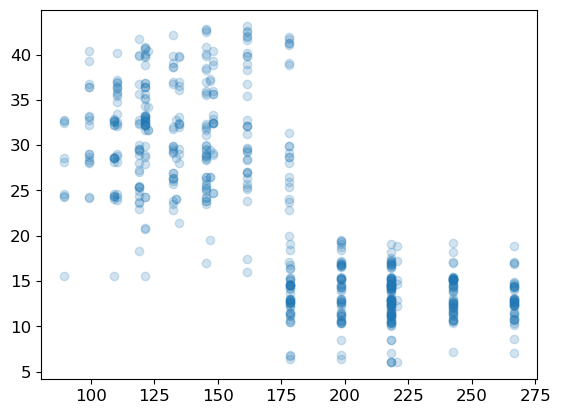

In [22]:
plt.scatter(x = train_set['Roof-Area'], y = train_set['Heating-Load'], alpha=0.2)
plt.show()

For roof area upto 150 the heating load goes up from 15 to 45 and for roof area from 175 to 275 the heating load goes from 5 to 20

Thus Heating Load goes up with increasing height and decreases with increasing roof area

#### Building Heating Load Distribution Box Plot 

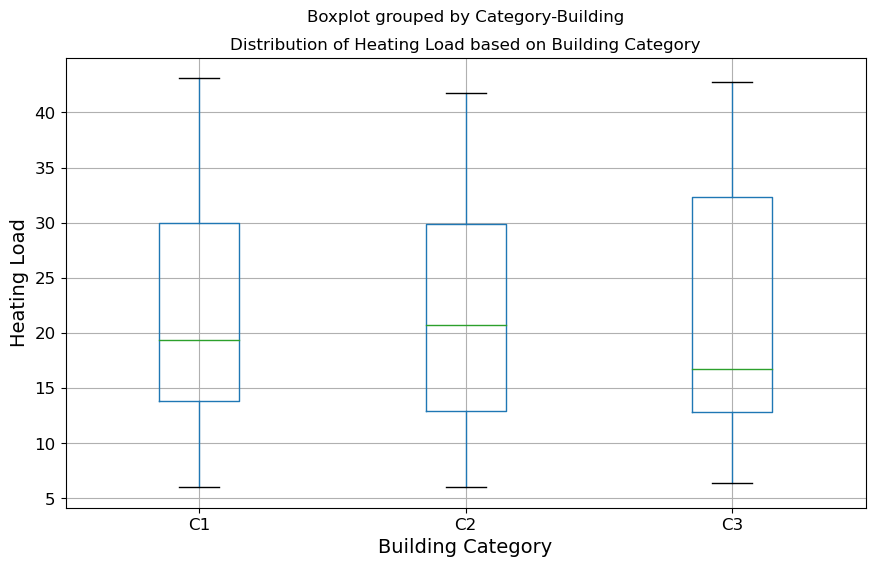

In [23]:
# create box plots for Y by X0
train_set.boxplot(column='Heating-Load', by='Category-Building', figsize=(10, 6))

# set plot title and axis labels
plt.title('Distribution of Heating Load based on Building Category')
plt.xlabel('Building Category')
plt.ylabel('Heating Load')

# show plot
plt.show()

To understand the distribution of the heating load for each building category, we decided to use the box plot which clearly visualizes the interquartile range as well as the median. We can alsouse the whiskers to show the minimum and maximum values. As you can see fromthe diagram above the x-axis is used to display the different categories of building, while the y-axis is used to show the heating load.

By comparing the box plots, we can see Category 2 (C2) buildings has the highest median heating load, while Category 3 (C3) buildings has the lowest median heating load. However, C3 buildings has the longest box suggesting a wider distribution of heating load in comparison to the the C1 and C2 buildings which have similar box lengths. From the whiskers of each category, we understood the minimum heating load is almost the same. The maximum heating load for C1 and C3 buildings are approximately the same; however C2 buildings has a lower maximum heating load. 

Overall, the box plots shows that C1 buildings on average are the more energy efficient than the other categories, as it has the smallest box size and the second smallest median. C3 buildings has the lowest median however the box is larger signifyng a larger distribution in heating load. C2 and C1 buildings are similar, however C2 has a slightly higher median than C1. 

## Split Labels from data

In [24]:
train_labels = train_set["Heating-Load"].copy()
train_set = train_set.drop("Heating-Load", axis=1)

test_labels = test_set["Heating-Load"].copy()
test_set = test_set.drop("Heating-Load", axis=1)

## Transformation Pipelines
Scikit-Learn Pipeline object that chains together a sequence of data preprocessing steps for numerical features.
StandardScaler class standardizes the dataset by scaling the numerical features to have a mean of 0 and a standard deviation of 1.

In [25]:
# Seperating Numerical Values
train_num_data = train_set.drop("Category-Building", axis=1)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])

train_num_pipeline_tr = num_pipeline.fit_transform(train_num_data)

In [27]:
train_num_pipeline_tr

array([[ 0.32633614, -1.40887782, -0.58523907, ..., -1.25587004,
        -1.05722443, -1.12189101],
       [-0.81710012, -0.26910413,  0.31254773, ...,  0.0523196 ,
         0.57913281, -0.49344882],
       [-0.48079534, -0.70328801, -0.95931691, ..., -0.24202307,
         0.08111104, -0.61789282],
       ...,
       [ 0.66264092, -0.75751997,  0.08402943, ...,  1.06616657,
        -0.84378653,  2.02654212],
       [ 1.40251144, -1.30024981,  0.58687147, ...,  2.05548498,
         0.50798684,  0.27810396],
       [ 1.53703336, -0.90232997, -1.07162508, ...,  0.34666226,
        -1.1283704 , -0.36900483]])

### Handling Text and Categorical Attributes
In the dataset there is only categorical attribute - 'Category-Building'
A ColumnTransformer object is initialized with a list of tuples, where each tuple specifies a transformer to be applied to a subset of the columns in the dataset. In this case, there are two transformers: one for the numerical features, which uses the num_pipeline object, and another for the categorical feature, which uses the OneHotEncoder().

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The num_attribs variable is a list of the column names for the numerical features in the dataset
# Cat_attribs is a list containing the name of the categorical feature column.
num_attribs = list(train_num_data)
cat_attribs = ["Category-Building"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_set)

In [29]:
train_prepared

array([[ 0.32633614, -1.40887782, -0.58523907, ...,  1.        ,
         0.        ,  0.        ],
       [-0.81710012, -0.26910413,  0.31254773, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48079534, -0.70328801, -0.95931691, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66264092, -0.75751997,  0.08402943, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.40251144, -1.30024981,  0.58687147, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.53703336, -0.90232997, -1.07162508, ...,  0.        ,
         0.        ,  1.        ]])

## Preprocessing for test data
Repeat the same steps again for test data

In [30]:
test_num_data = test_set.drop("Category-Building", axis=1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])

building_num_pipeline_tr = num_pipeline.fit_transform(test_num_data)

from sklearn.compose import ColumnTransformer

# The num_attribs variable is a list of the column names for the numerical features in the dataset
# Cat_attribs is a list containing the name of the categorical feature column.
num_attribs = list(test_num_data)
cat_attribs = ["Category-Building"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
                                                                                            
test_prepared = full_pipeline.fit_transform(test_set)

In [31]:
train_prepared.shape

(614, 11)

In [32]:
test_prepared.shape

(154, 11)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

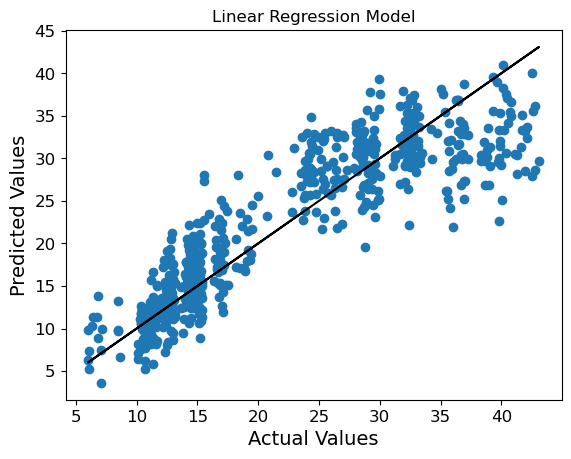

In [34]:
import matplotlib.pyplot as plt

# Make predictions on the test set
train_predictions = lin_reg.predict(train_prepared)

# Scatter plot of predicted vs. actual values
plt.scatter(train_labels, train_predictions)
plt.plot(train_labels, train_labels, color='0');
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

This is a scatter plot of predicted versus actual values for the linear regression model. It appears that the model performs reasonably well for smaller actual values, with the predicted values closely clustered around the diagonal line. This suggests that the linear regression model may not be capturing the full complexity of the relationship between the input variables and the target variable, and may be underfitting to some extent.

In [35]:
lin_reg.intercept_, lin_reg.coef_

(22.15176831543411,
 array([-0.20293514, -0.49160858,  1.70990442, -2.62856174,  5.69352408,
        -0.30250189,  2.74609175,  0.24315474, -0.04348326, -0.23982865,
         0.28331191]))

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Generate predictions on the training set
train_predictions = lin_reg.predict(train_prepared)

# Calculate mean squared error between predictions and actual values
train_lin_reg_mse = np.sqrt(mean_squared_error(train_labels, train_predictions))
# Calculate mean absolute error between predictions and actual values
train_lin_reg_mae = mean_absolute_error(train_labels, train_predictions)

print("Root Mean squared error on training set: ", train_lin_reg_mse)
print("Mean absolute error on training set: ", train_lin_reg_mae)

Root Mean squared error on training set:  4.479581032349324
Mean absolute error on training set:  3.4039522565248106


## Ridge Regression

First we use GridSearchCV using default ridgre regression object to find the best hyperparameters by creating a tuple of with various available values of these hyperparameters
- alpha
- solver

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# Create a Ridge regression object ridge_reg
ridge_reg = Ridge()

# Define the grid of hyperparameters to search over
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the grid search object on the training data
grid_search.fit(train_prepared, train_labels)

# Print the best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', -grid_search.best_score_)

Best Hyperparameters: {'alpha': 10.0, 'solver': 'saga'}
Best Score: 20.95226169602911


with the help of GridSearchCV we select alpha value of 10.0 and 'saga' solver and input that into Ridge regularisation model

In [38]:
# Create a Ridge regression object
ridge_reg = Ridge(alpha=10.0, solver='saga')

# Fit the model on the training data
ridge_reg.fit(train_prepared, train_labels)

# Evaluate the model on the training set
train_predictions = ridge_reg.predict(train_prepared)

# Calculate mean squared error between predictions and actual values
train_ridge_reg_mse = np.sqrt(mean_squared_error(train_labels, train_predictions))
# Calculate mean absolute error between predictions and actual values
train_ridge_reg_mae = mean_absolute_error(train_labels, train_predictions)

print("Root Mean squared error on training set: ", train_ridge_reg_mse)
print("Mean absolute error on training set: ", train_ridge_reg_mae)

Root Mean squared error on training set:  4.481490866786824
Mean absolute error on training set:  3.3986433029980327


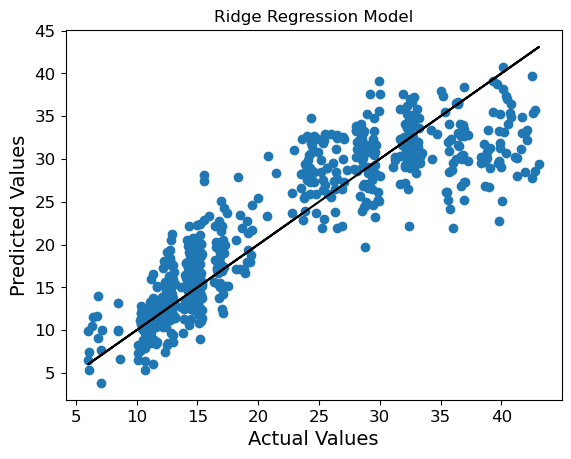

In [39]:
import matplotlib.pyplot as plt

# Make predictions on the test set
train_predictions = ridge_reg.predict(train_prepared)

# Create a scatter plot of predicted vs. actual values
plt.scatter(train_labels, train_predictions)
plt.plot(train_labels, train_labels, color='0');
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Model')
plt.show()

This is a scatter plot of predicted versus actual values for the Ridge regression model. It appears that the model performs reasonably well for smaller actual values, with the predicted values closely clustered around the diagonal line. This suggests that the Ridge regression model may not be capturing the full complexity of the relationship between the input variables and the target variable for higher values, and may be underfitting to some extent.

## Lasso Regression

Before creating the model lets look at different hyperparameters in lasso and pick one to optmize using GridSearchCV

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso()
print(lasso.get_params().keys())

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


Lasso regression doesn't have a solver parameter

In [41]:
from sklearn.model_selection import GridSearchCV

# Create a Lasso regression object lasso_reg
lasso_reg = Lasso()

# Define the grid of hyperparameters to search over
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the grid search object on the training data
grid_search.fit(train_prepared, train_labels)

# Print the best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', -grid_search.best_score_)


Best Hyperparameters: {'alpha': 0.1}
Best Score: 20.81850648174326


In [42]:
# Create a Ridge regression object
lasso_reg = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_reg.fit(train_prepared, train_labels)

# Evaluate the model on the training set
train_predictions = lasso_reg.predict(train_prepared)

# Calculate mean squared error between predictions and actual values
train_lasso_reg_mse = np.sqrt(mean_squared_error(train_labels, train_predictions))
# Calculate mean absolute error between predictions and actual values
train_lasso_reg_mae = mean_absolute_error(train_labels, train_predictions)

print("Root Mean squared error on training set: ", train_lasso_reg_mse)
print("Mean absolute error on training set: ", train_lasso_reg_mse)

Root Mean squared error on training set:  4.4935768352490415
Mean absolute error on training set:  4.4935768352490415


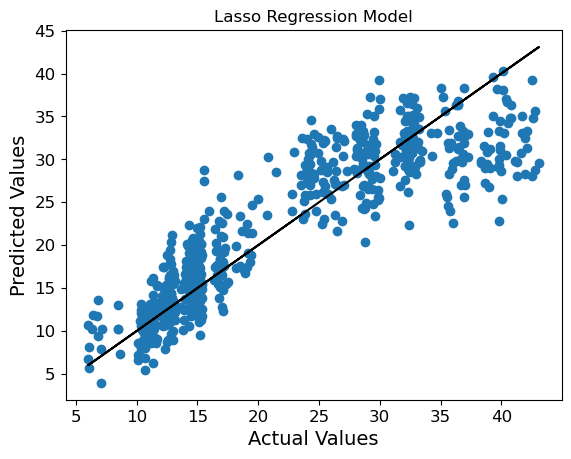

In [43]:
import matplotlib.pyplot as plt

# Make predictions on the test set
train_predictions = lasso_reg.predict(train_prepared)

# Create a scatter plot of predicted vs. actual values
plt.scatter(train_labels, train_predictions)
plt.plot(train_labels, train_labels, color='0');
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Model')
plt.show()

This is a scatter plot of predicted versus actual values for the lasso regression model. It appears that the model performs reasonably well for smaller actual values, with the predicted values closely clustered around the diagonal line. This suggests that the lasso regression model may not be capturing the full complexity of the relationship between the input variables and the target variable for higher values, and may be underfitting to some extent.

## Polynomial Regression with Ridge regularisation

Use GridSearchCV method from Sklear library to find the best polynomial degree and alpha value to use for ridge regularisation. 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [45]:
# Set up parameter grid for grid search
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
    'ridge__alpha': [0.01, 0.1, 1, 10]
}

# Create a pipeline for polynomial regression with regularization
poly_reg = make_pipeline(PolynomialFeatures(), Ridge())

# Set up the grid search object
grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid_search.fit(train_prepared, train_labels)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", -grid_search.best_score_)

Best hyperparameters:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
Best mean squared error:  18.024366351957827


In [46]:
# Create a pipeline for polynomial regression with regularization
degree = 2
alpha = 10
poly_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))

# Fit the pipeline to the training data
poly_reg.fit(train_prepared, train_labels)

# Generate predictions on the training set
train_predictions = poly_reg.predict(train_prepared)

# Calculate mean squared error between predictions and actual values
train_poly_reg_mse = np.sqrt(mean_squared_error(train_labels, train_predictions))
# Calculate mean absolute error between predictions and actual values
train_poly_reg_mae = mean_absolute_error(train_labels, train_predictions)

print("Root Mean squared error on training set: ", train_poly_reg_mse)
print("Mean absolute error on training set: ", train_poly_reg_mae)

Root Mean squared error on training set:  3.798902639779899
Mean absolute error on training set:  2.9344349644292587


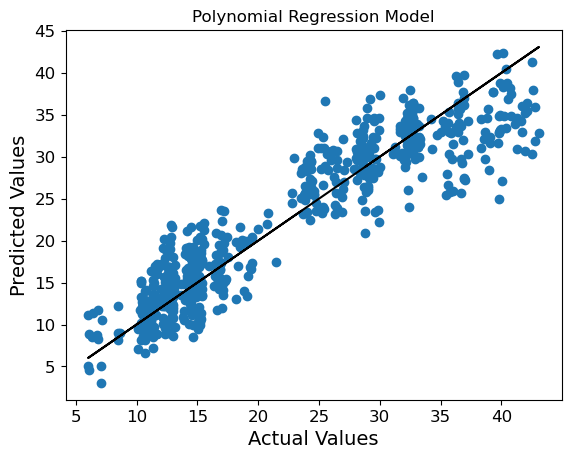

In [47]:
import matplotlib.pyplot as plt

# Make predictions on the test set
train_predictions = poly_reg.predict(train_prepared)

# Create a scatter plot of predicted vs. actual values
plt.scatter(train_labels, train_predictions)
plt.plot(train_labels, train_labels, color='0');
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Model')
plt.show()

This is a scatter plot of predicted versus actual values for the Polynomial Regression with Ridge regularisation model. It appears that the model performs reasonably well for both smaller actual values and higher actual values, with the predicted values closely clustered around the diagonal line. This suggests that the Polynomial Regression model may be more accurate in comparison with other models.

## Elastic Net Regression

Use GridSearchCV method from Sklearn library to find the best hyperparameters to search over and to use for elastic net regression

In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# ElasticNet regression object
elastic_net_reg = ElasticNet()

# The grid of hyperparameters to search over
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(elastic_net_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fitting the grid search object on the training data
grid_search.fit(train_prepared, train_labels)

# Printing the best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', -grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Best Score: 20.82502663595353


In [49]:
# Create an ElasticNet regression object with best hyperparameters
elastic_net_reg = ElasticNet(alpha=grid_search.best_params_['alpha'], 
                             l1_ratio=grid_search.best_params_['l1_ratio'])

# Fit the model on the training data
elastic_net_reg.fit(train_prepared, train_labels)

# Evaluate the model on the training set
train_predictions = elastic_net_reg.predict(train_prepared)

# Calculating mean squared error between predictions and actual values
train_elastic_net_reg_mse = np.sqrt(mean_squared_error(train_labels, train_predictions))

# Calculating mean absolute error between predictions and actual values
train_elastic_net_reg_mae = mean_absolute_error(train_labels, train_predictions)

print("Root Mean squared error on training set: ", train_elastic_net_reg_mse)
print("Mean absolute error on training set: ", train_elastic_net_reg_mae)

Root Mean squared error on training set:  4.493760591617739
Mean absolute error on training set:  3.4008230396457035


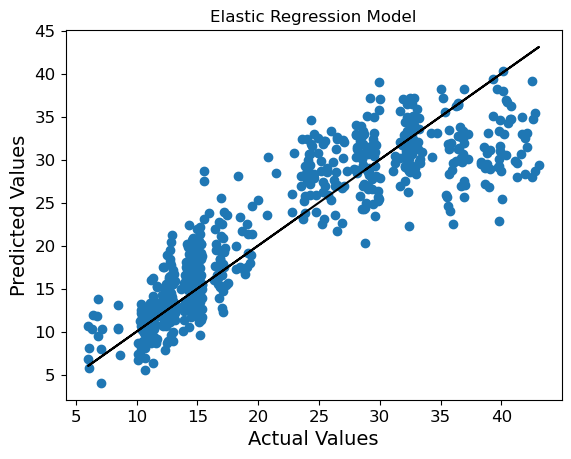

In [50]:
import matplotlib.pyplot as plt

# test set predictions 
train_predictions = elastic_net_reg.predict(train_prepared)

# scatter plot of predicted vs. actual values
plt.scatter(train_labels, train_predictions)
plt.plot(train_labels, train_labels, color='0');
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Elastic Regression Model')
plt.show()

This is a scatter plot of predicted versus actual values for the Elastic Regression Model. It appears that the model performs reasonably well for smaller actual values, with the predicted values closely clustered around the diagonal line. This suggests that the Elastic Regression Model may not be capturing the full complexity of the relationship between the input variables and the target variable for higher values, and may be underfitting to some extent.

### Neural Network Regression

In [51]:
from sklearn.neural_network import MLPRegressor

# Define the neural network architecture
neural_net_reg = MLPRegressor(hidden_layer_sizes=(64, 32), 
                     activation='relu', 
                     solver='adam', 
                     alpha=0.0001, 
                     max_iter=200)


# Train the model
neural_net_reg.fit(train_prepared, train_labels)

# Evaluate the model on the training set
train_predictions = neural_net_reg.predict(train_prepared)
train_neural_net_reg_mse = np.sqrt(mean_squared_error(train_labels, train_predictions))
train_neural_net_reg_mae = mean_absolute_error(train_labels, train_predictions)

print("Root Mean squared error on training set: ", train_neural_net_reg_mse)
print("Mean absolute error on training set: ", train_neural_net_reg_mae)

Root Mean squared error on training set:  4.105391983799861
Mean absolute error on training set:  2.9218055550167827


/Users/Code/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


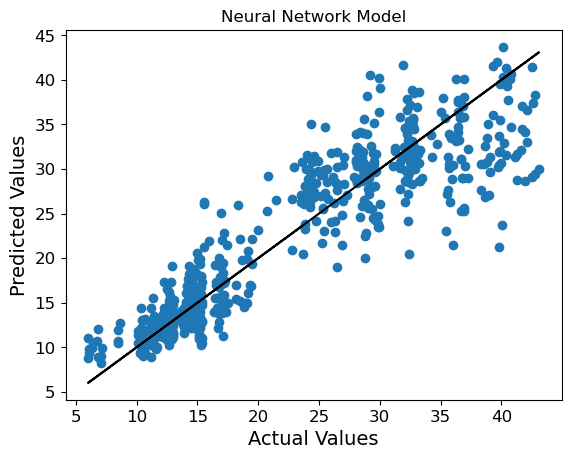

In [52]:
import matplotlib.pyplot as plt

# Making predictions on the test set
train_predictions = neural_net_reg.predict(train_prepared)

# Scatter plot of predicted vs. actual values
plt.scatter(train_labels, train_predictions)
plt.plot(train_labels, train_labels, color='0');
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Model')
plt.show()

This is a scatter plot of predicted versus actual values for the Neural Network Model. It appears that the model performs reasonably well for smaller actual values, with the predicted values closely clustered around the diagonal line. This suggests that the Neural Network Model may not be capturing the full complexity of the relationship between the input variables and the target variable for higher values, and may be underfitting to some extent.

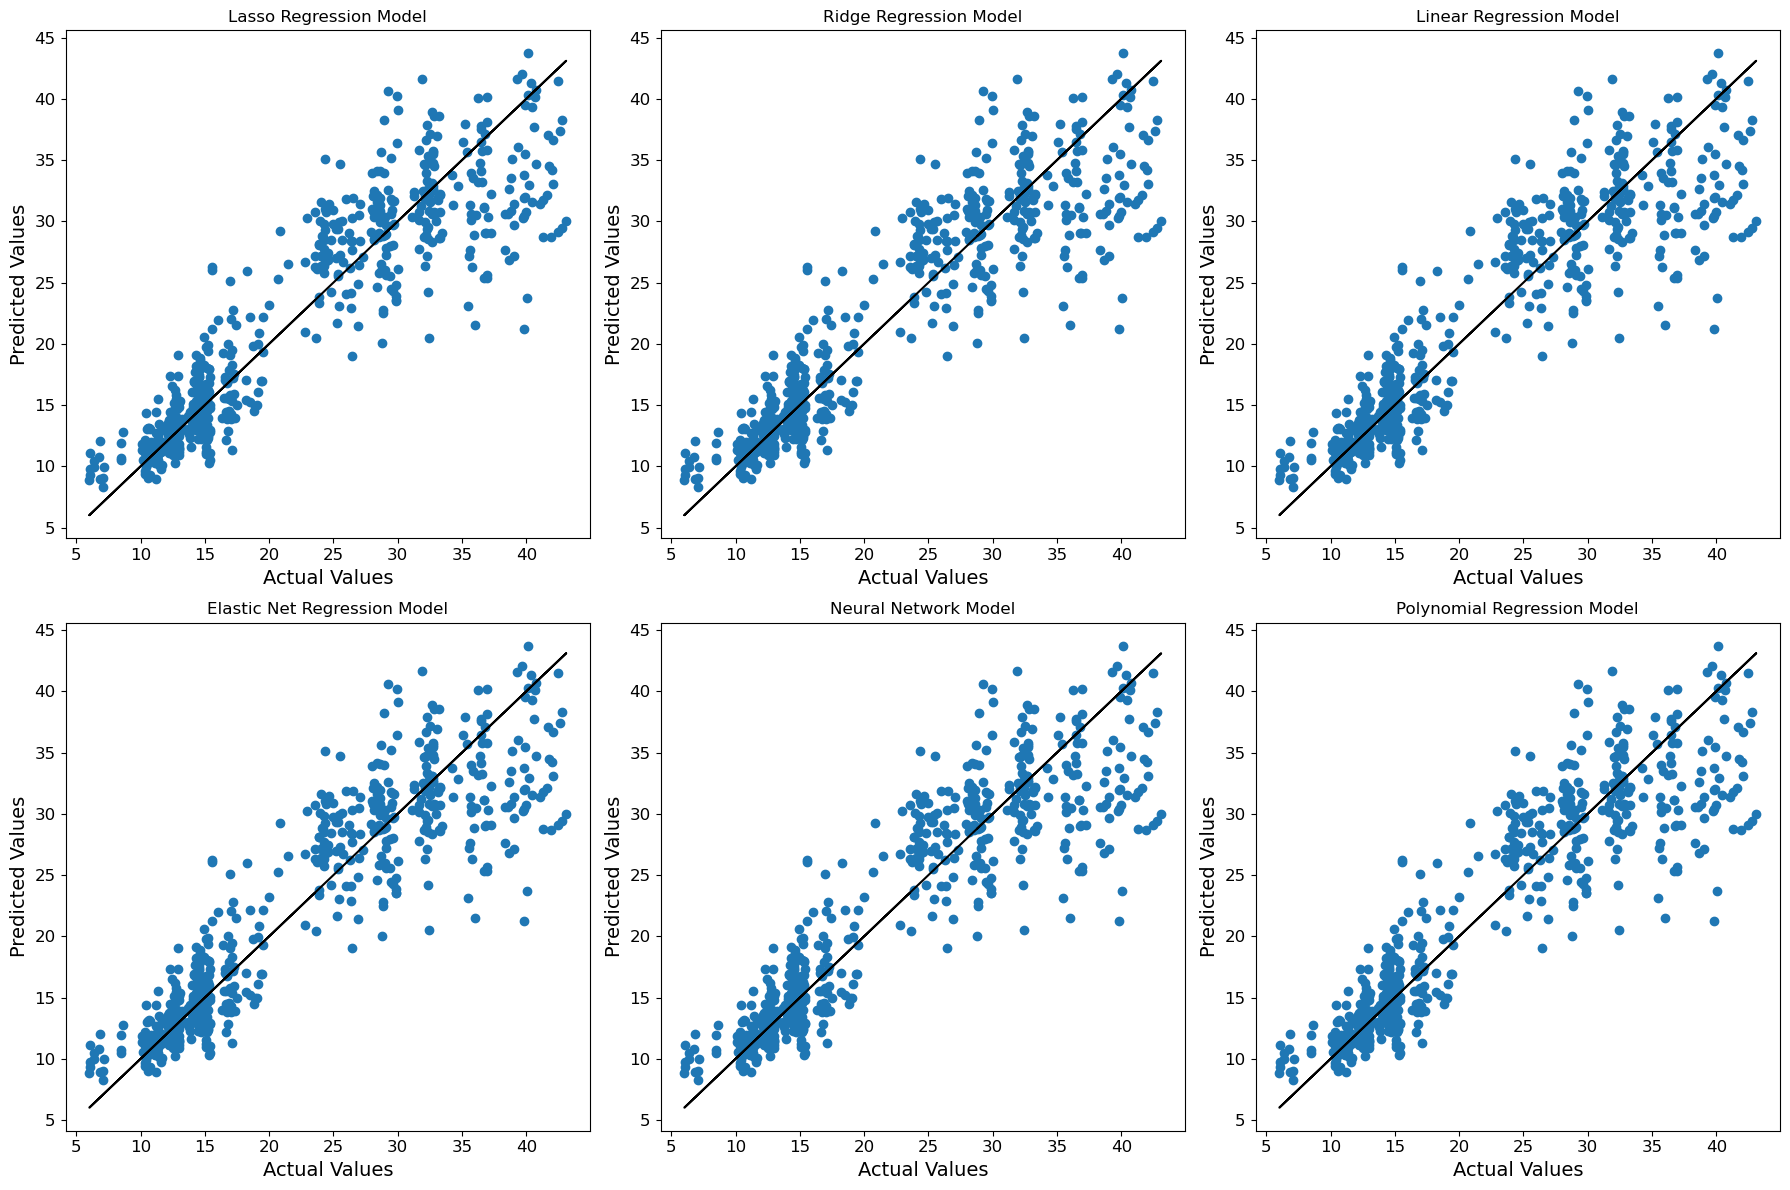

lasso_reg
Root Mean squared error on training set:  4.4935768352490415
Mean absolute error on training set:  3.4032432930593597
ridge_reg
Root Mean squared error on training set:  4.481490866786824
Mean absolute error on training set:  3.3986433029980327
lin_reg
Root Mean squared error on training set:  4.479581032349324
Mean absolute error on training set:  3.4039522565248106
elastic_net
Root Mean squared error on training set:  4.493760591617739
Mean absolute error on training set:  3.4008230396457035
poly_reg
Root Mean squared error on training set:  3.798902639779899
Mean absolute error on training set:  2.9344349644292587
neural_net_reg
Root Mean squared error on training set:  4.105391983799861
Mean absolute error on training set:  2.9218055550167827


In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Lasso Regression Model
train_predictions_lasso = lasso_reg.predict(train_prepared)
axes[0, 0].scatter(train_labels, train_predictions)
axes[0, 0].plot(train_labels, train_labels, color='0')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Lasso Regression Model')

# Ridge Regression Model
train_predictions_ridge = ridge_reg.predict(train_prepared)
axes[0, 1].scatter(train_labels, train_predictions)
axes[0, 1].plot(train_labels, train_labels, color='0')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title('Ridge Regression Model')

# Linear Regression Model
train_predictions_lin = lin_reg.predict(train_prepared)
axes[0, 2].scatter(train_labels, train_predictions)
axes[0, 2].plot(train_labels, train_labels, color='0')
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')
axes[0, 2].set_title('Linear Regression Model')

# Elastic Net Regression Model
train_predictions_elnet = elastic_net_reg.predict(train_prepared)
axes[1, 0].scatter(train_labels, train_predictions)
axes[1, 0].plot(train_labels, train_labels, color='0')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title('Elastic Net Regression Model')

# Neural Network Model
train_predictions_NN = neural_net_reg.predict(train_prepared)
axes[1, 1].scatter(train_labels, train_predictions)
axes[1, 1].plot(train_labels, train_labels, color='0')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Neural Network Model')

# Polynomial Regression Model
train_predictions_poly = poly_reg.predict(train_prepared)
axes[1, 2].scatter(train_labels, train_predictions)
axes[1, 2].plot(train_labels, train_labels, color='0')
axes[1, 2].set_xlabel('Actual Values')
axes[1, 2].set_ylabel('Predicted Values')
axes[1, 2].set_title('Polynomial Regression Model')

plt.tight_layout()
plt.show()

print("lasso_reg")
print("Root Mean squared error on training set: ", train_lasso_reg_mse)
print("Mean absolute error on training set: ", train_lasso_reg_mae)
print("ridge_reg")
print("Root Mean squared error on training set: ", train_ridge_reg_mse)
print("Mean absolute error on training set: ", train_ridge_reg_mae)
print("lin_reg")
print("Root Mean squared error on training set: ", train_lin_reg_mse)
print("Mean absolute error on training set: ", train_lin_reg_mae)
print("elastic_net")
print("Root Mean squared error on training set: ", train_elastic_net_reg_mse)
print("Mean absolute error on training set: ", train_elastic_net_reg_mae)
print("poly_reg")
print("Root Mean squared error on training set: ", train_poly_reg_mse)
print("Mean absolute error on training set: ", train_poly_reg_mae)
print("neural_net_reg")
print("Root Mean squared error on training set: ", train_neural_net_reg_mse)
print("Mean absolute error on training set: ", train_neural_net_reg_mae)

To determine the best two regression models we analysed the graphs and compared the root mean squared error (RMSE) and mean absolute error (MAE) of each model; from the analysis we discovered that the polynomial and neural network regression model had the highest accuracy. We came to this conclusion, because the polynomial regression model has the lowest MSE value (3.798902639779899) and the lowest MAE value (2.9344349644292587); while the neural network regression model had the second lowest MSE value (4.266705905239294) and the lowest MAE Value (2.9218055550167827) amongst the other models. 

From comparing the graphs we can see that the polynomial model is the most acurate on larger values than the others and has less outliers than other models hence the good RMSE value.

neural nework model is less accurate on large values creating outliers hence resulting in a lower RMSE as RMSE is more sensitive to outliers however the model is the most accurate with small values as you can see the points are clustered tightly on the lower end of the graph this waas what resulted in the lower MAE value.

# Testing the Models on Test_set

### Polynomial Regression

In [55]:
# Make predictions on the test set
test_predictions_poly = poly_reg.predict(test_prepared)

# Evaluate the model on the test set using mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, test_predictions_poly)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) on test set: {:.2f}".format(rmse))

Root Mean Squared Error (RMSE) on test set: 4.37


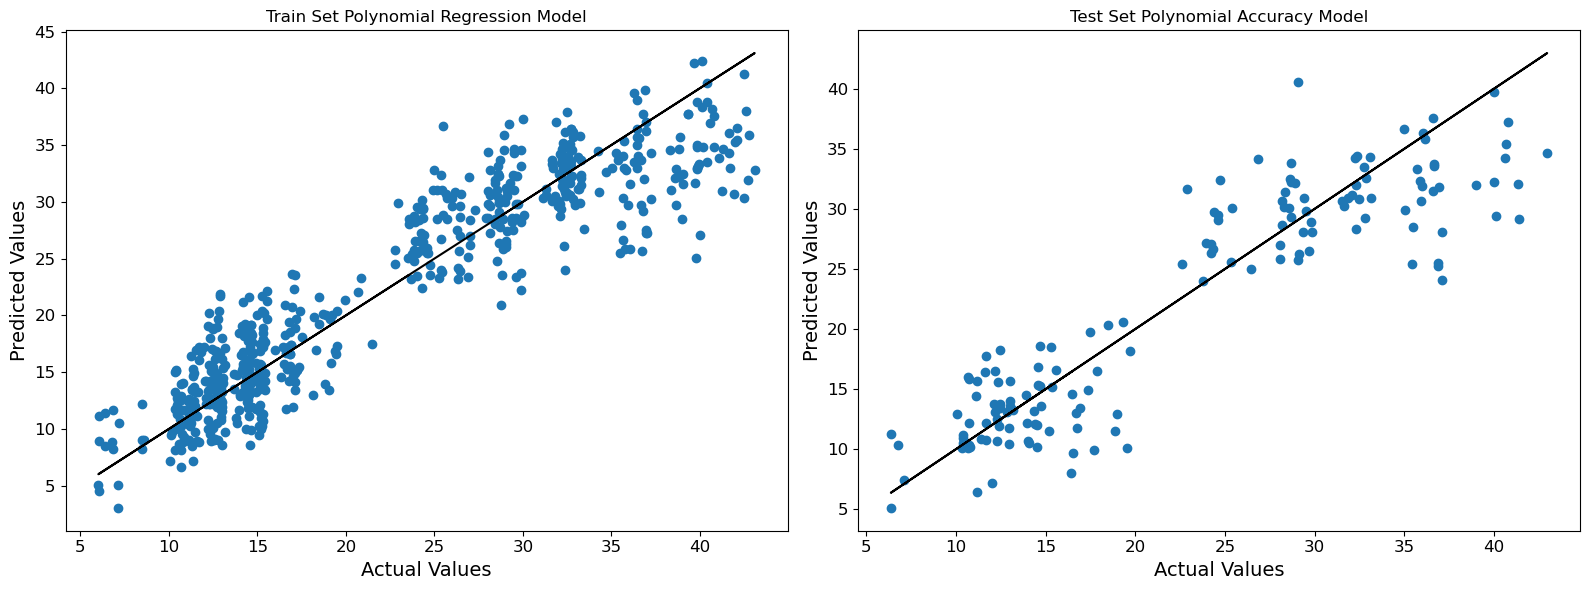

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Train Set Polynomial Regression Model
axes[0].scatter(train_labels, train_predictions_poly)
axes[0].plot(train_labels, train_labels, color='0')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Train Set Polynomial Regression Model')

# Test Set Polynomial Accuracy Model
axes[1].scatter(test_labels, test_predictions_poly)
axes[1].plot(test_labels, test_labels, color='0')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Test Set Polynomial Accuracy Model')

plt.tight_layout()
plt.show()


From these graphs we can see that the polynomial regression model was a bit less accurate on the test set predictions, than the training set predictions. We can see this from the wider dots on the lower end and a few outliers on the higher end of the graph which was not noticeable on the training set.

### Neural Net Regression

In [57]:
# Make predictions on the test set
test_predictions_NN = neural_net_reg.predict(test_prepared)

# Evaluate the model on the test set using mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, test_predictions_NN)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) on test set: {:.2f}".format(rmse))

Root Mean Squared Error (RMSE) on test set: 4.48


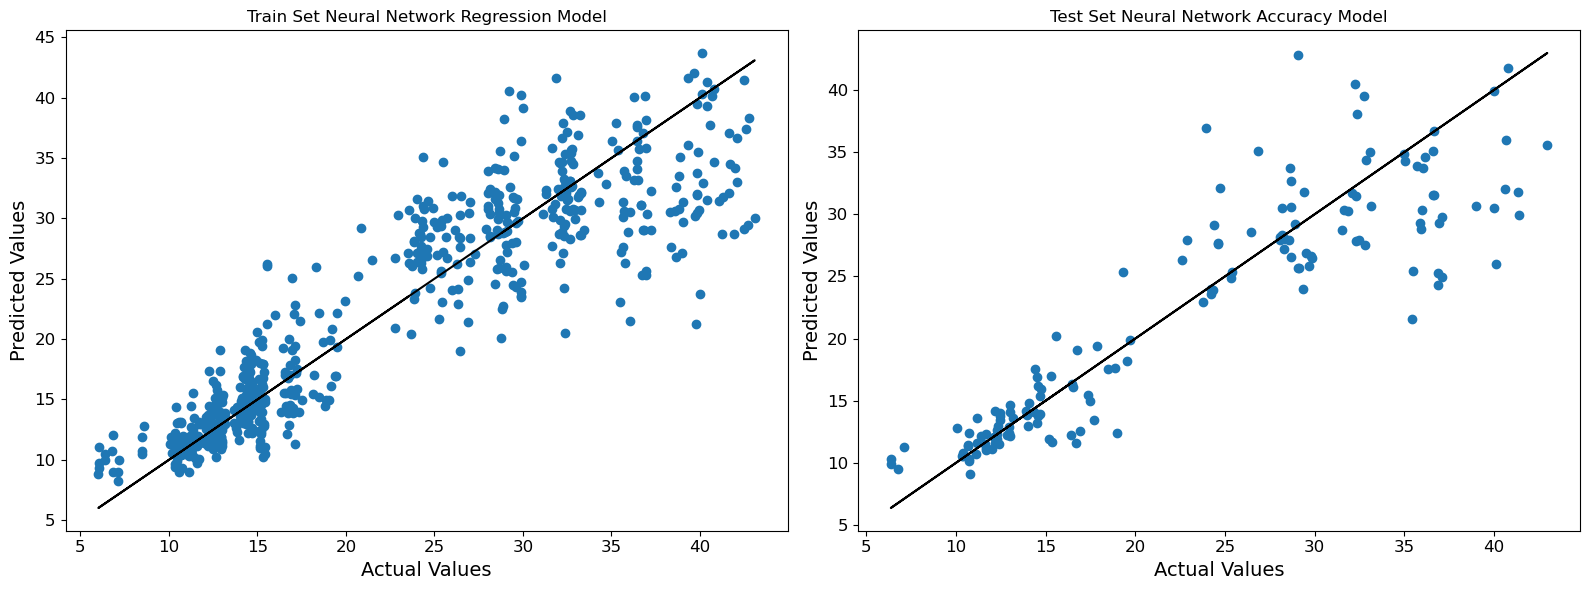

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Train Set Neural Network Regression Model
axes[0].scatter(train_labels, train_predictions_NN)
axes[0].plot(train_labels, train_labels, color='0')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Train Set Neural Network Regression Model')

# Test Set Neural Network Accuracy Model
axes[1].scatter(test_labels, test_predictions_NN)
axes[1].plot(test_labels, test_labels, color='0')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Test Set Neural Network Accuracy Model')

plt.tight_layout()
plt.show()

From these graphs we can see that the Neural Network regression model was somewhat equally accurate on the test set predictions, than the training set predictions. From the tight cluster on the lower values we can see that the test set prediction are somewhat equally accurate on the lower end,however on larger values there are more outliers which was not as blatant on the training set.From these graphs we can see that the Neural Network regression model was somewhat equally accurate on the test set predictions, than the training set predictions. From the tight cluster on the lower values we can see that the test set prediction are somewhat equally accurate on the lower end,however on larger values there are more outliers which was not as blatant on the training set.

## Conclusion 

In conclusion, we successfully applied six different regression models to train the given dataset, with the objective of identifying the top two based on their performance metrics. After a thorough evaluation, the two best models were selected from training the train data set, and their performance was assessed using RMSE and MAE values. Additionally, we tested the models on unseen data, comparing their RMSE values to ensure a reliable evaluation of their generalization capabilities which is the models' ability to maintain a consistent performance on new, unseen data.